In [1]:
import numpy as np;
import pandas as pd;

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import matthews_corrcoef,make_scorer,roc_auc_score,precision_recall_curve, auc
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
!pip install --upgrade scikit-learn
mccScorer = make_scorer(matthews_corrcoef)
roc_auc_scoreScorer=make_scorer(roc_auc_score)
from numpy import mean
from numpy import std

from google.colab import drive
drive.mount("/content/gdrive")

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import cross_validate

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import  PowerTransformer

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
#read training dataset 1
data1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Dataset_1_Training.csv')

X_train_actual_1=data1[:-2].T[1:].values

y_train_actual_1 = data1[-2:].T[-130:].T.values

In [3]:
#read training dataset 2
data2 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Dataset_2_Training.csv')

X_train_actual_2=data2[:-4].T[1:].values

y_train_actual_2 = data2[-4:].T[-340:].T.values

In [4]:
co1={'X':X_train_actual_1,'Y': y_train_actual_1[0]};
co2={'X':X_train_actual_1,'Y': y_train_actual_1[1]};

co3={'X':X_train_actual_2,'Y': y_train_actual_2[0]};
co4={'X':X_train_actual_2,'Y': y_train_actual_2[1]};
co5={'X':X_train_actual_2,'Y': y_train_actual_2[2]};
co6={'X':X_train_actual_2,'Y': y_train_actual_2[3]};

In [5]:
def determine_number_of_top_features(X,Y):
  X=pd.DataFrame(X)
  X=X.astype(float)

  Y=pd.DataFrame(Y)
  Y=Y.astype(int)

  sel = f_classif(X, Y)
  p_values = pd.Series(sel[1])
  p_values.index = X.columns
  p_values.sort_values(ascending=True, inplace=True)
  p_values = p_values[p_values < 0.05]
  X_p = X[p_values.index]
  return X_p.shape[1]

In [6]:
best_co1=determine_number_of_top_features(**co1)
best_co2=determine_number_of_top_features(**co2)
best_co3=determine_number_of_top_features(**co3)
best_co4=determine_number_of_top_features(**co4)
best_co5=determine_number_of_top_features(**co5)
best_co6=determine_number_of_top_features(**co6)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [7]:
def feature_selector(X,Y,numberOfFeaturesToBeSelected=1):
  if(numberOfFeaturesToBeSelected == 1):
    totalNumberOfFeatures=X.shape[1]
    numberOfFeaturesToBeSelected=totalNumberOfFeatures//2;
  # define feature selection
  fs = SelectKBest(score_func=f_classif, k=numberOfFeaturesToBeSelected)
  # apply feature selection
  return fs.fit(X, Y)

In [6]:
def naive_bayes_with_HPTuning(X,Y):
  # define model
  model = GaussianNB()

  pipeline = Pipeline(
    [
     ('selector',SelectKBest(f_classif)),
     ('model',model)
    ]
  )
    
  # define evaluation
  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
  # define search space
  space = dict()
  space['model__var_smoothing'] = [int(x) for x in np.logspace(0,-9, num=10)]
  space['selector__k'] = [int(x) for x in np.linspace(start = 5 , stop = (X.shape[1]//2), num = 100)]
  
  # define search
  search = GridSearchCV(pipeline, space, scoring=mccScorer,cv=cv)
  #X_selected_features=feature_selector(X,Y,numberOfFeaturesToBeSelected=numberOfFeatures).transform(X);
  x_data_transformed = PowerTransformer().fit_transform(X)
  # execute search
  result = search.fit(x_data_transformed, Y.astype('int'))
  # summarize result
  print('Best MCC Score: %s' % result.best_score_)
  print('Best Hyperparameters: %s' % result.best_params_)

In [ ]:
naive_bayes_with_HPTuning(**co1)

Best MCC Score: 0.5579440081767044
Best Hyperparameters: {'model__var_smoothing': 1, 'selector__k': 7316}


In [ ]:
naive_bayes_with_HPTuning(**co2)

Best MCC Score: 0.4687181993253495
Best Hyperparameters: {'model__var_smoothing': 1, 'selector__k': 5}


In [ ]:
naive_bayes_with_HPTuning(**co3)

Best MCC Score: 0.3180406022521378
Best Hyperparameters: {'model__var_smoothing': 1, 'selector__k': 1109}


In [ ]:
naive_bayes_with_HPTuning(**co4)

Best MCC Score: 0.27853750220757445
Best Hyperparameters: {'model__var_smoothing': 0, 'selector__k': 5}


In [ ]:
naive_bayes_with_HPTuning(**co5)

Best MCC Score: 0.7881143039067477
Best Hyperparameters: {'model__var_smoothing': 1, 'selector__k': 5}


In [ ]:
naive_bayes_with_HPTuning(**co6)

Best MCC Score: 0.05997085916059355
Best Hyperparameters: {'model__var_smoothing': 0, 'selector__k': 557}


In [8]:
def plot_PRC_for_CV(predictor,k_fold,X,y,label):
  f, axes = plt.subplots(1,1,squeeze=False)
  
  y_real = []
  y_proba = []
  
  for i, (train_index, test_index) in enumerate(k_fold.split(X,y)):
    Xtrain, Xtest = X[train_index], X[test_index]
    ytrain, ytest = y[train_index], y[test_index]
    predictor.fit(Xtrain, ytrain)
    pred_proba = predictor.predict_proba(Xtest)
    precision, recall, _ = precision_recall_curve(ytest, pred_proba[:,1])
    lab = 'Fold %d AUC=%.4f' % (i+1, auc(recall, precision))
    axes[0,0].step(recall, precision, label=lab)
    y_real.append(ytest)
    y_proba.append(pred_proba[:,1])

  y_real = np.concatenate(y_real)
  y_proba = np.concatenate(y_proba)
  precision, recall, _ = precision_recall_curve(y_real, y_proba)
  lab = 'Overall AUC=%.4f' % (auc(recall, precision))
  axes[0,0].step(recall, precision, label=lab, lw=2, color='black')
  axes[0,0].set_xlabel('Recall')
  axes[0,0].set_ylabel('Precision')
  axes[0,0].legend(loc='lower left', fontsize='small')
  axes[0,0].set(title=label)

  # f.tight_layout()
  f.savefig(label+'.png')

In [9]:
def plot_ROC_for_CV(classifier,cv,X,y,label):
  tprs = []
  aucs = []
  mean_fpr = np.linspace(0, 1, 100)

  fig, ax = plt.subplots()
  for i, (train, test) in enumerate(cv.split(X, y)):
      classifier.fit(X[train], y[train])
      viz = RocCurveDisplay.from_estimator(
          classifier,
          X[test],
          y[test],
          name="ROC fold {}".format(i),
          alpha=0.3,
          lw=1,
          ax=ax,
      )
      interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
      interp_tpr[0] = 0.0
      tprs.append(interp_tpr)
      aucs.append(viz.roc_auc)

  ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = auc(mean_fpr, mean_tpr)
  std_auc = np.std(aucs)
  ax.plot(
      mean_fpr,
      mean_tpr,
      color="b",
      label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
      lw=2,
      alpha=0.8,
  )

  std_tpr = np.std(tprs, axis=0)
  tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
  tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
  ax.fill_between(
      mean_fpr,
      tprs_lower,
      tprs_upper,
      color="grey",
      alpha=0.2,
      label=r"$\pm$ 1 std. dev.",
  )

  ax.set(
      xlim=[-0.05, 1.05],
      ylim=[-0.05, 1.05],
      title=label,
  )
  ax.legend(loc="lower right")
  plt.show()
  fig.savefig(label+'.png')

In [12]:
def naivebayes_with_cross_validation(X,Y,smoothing,endpointLabel,numberOfFeatures=1):

  # define model
  model = GaussianNB(var_smoothing=smoothing)

  scoringReports={'mccScorer': mccScorer,'accuracy': 'accuracy','precision':'precision','recall':'recall', 'f1':'f1','ruc_auc':roc_auc_scoreScorer}
  
  # define evaluation
  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)

  X_selected_features=feature_selector(X,Y,numberOfFeaturesToBeSelected=numberOfFeatures).transform(X);
  #x_data_transformed = PowerTransformer().fit_transform(X_selected_features)
  scores = cross_validate(model,X_selected_features , Y.astype('int'), scoring=scoringReports, cv=cv)

  # summarize result
  print(model.get_params())
  print('MCC Score- Mean: %.3f SD: (%.3f)' % (mean(scores['test_mccScorer']), std(scores['test_mccScorer'])))
  print(list(scores.keys()))
  print("Means",mean(list(scores.values()),axis=1))
  print("SD",std(list(scores.values()),axis=1))
  plot_PRC_for_CV(model,cv,X_selected_features,Y.astype('int'),'PR-GaussianNB-'+endpointLabel)
  plot_ROC_for_CV(model,cv,X_selected_features,Y.astype('int'),'ROC-GaussianNB-'+endpointLabel)

{'priors': None, 'var_smoothing': 1}
MCC Score- Mean: 0.592 SD: (0.080)
['fit_time', 'score_time', 'test_mccScorer', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_ruc_auc']
Means [0.03940253 0.01043792 0.59199554 0.82307692 0.61837662 0.81428571
 0.70044387 0.81924812]
SD [0.00633941 0.00177916 0.07970793 0.03922323 0.07103243 0.07438333
 0.06084172 0.03984709]


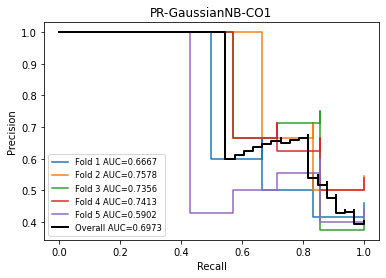

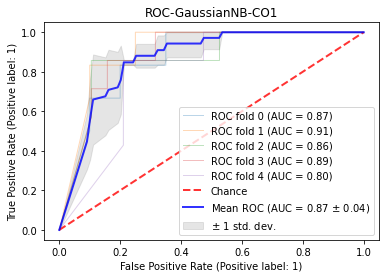

In [13]:
naivebayes_with_cross_validation(co1['X'],co1['Y'],1,'CO1',best_co1)

{'priors': None, 'var_smoothing': 1}
MCC Score- Mean: 0.508 SD: (0.145)
['fit_time', 'score_time', 'test_mccScorer', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_ruc_auc']
Means [0.02580247 0.0085423  0.5084358  0.73076923 0.64455321 0.84727273
 0.72229591 0.74905303]
SD [0.00099435 0.00020642 0.14481114 0.0806776  0.13232402 0.09948628
 0.08014375 0.06950319]


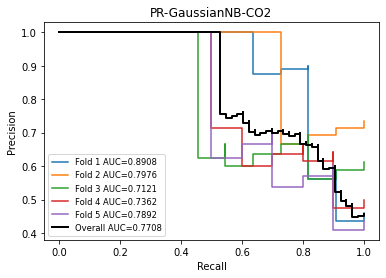

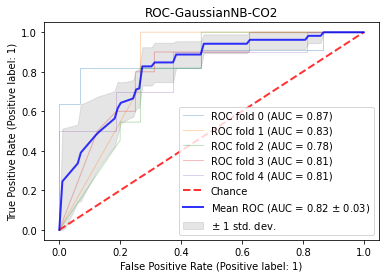

In [14]:
naivebayes_with_cross_validation(co2['X'],co2['Y'],1,'CO2',best_co2)

{'priors': None, 'var_smoothing': 1}
MCC Score- Mean: 0.396 SD: (0.097)
['fit_time', 'score_time', 'test_mccScorer', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_ruc_auc']
Means [0.5105608  0.03392301 0.39601312 0.75588235 0.526      0.60220588
 0.55206349 0.70355392]
SD [0.00616859 0.00092126 0.09739703 0.05703153 0.11791522 0.06056253
 0.05623978 0.03729976]


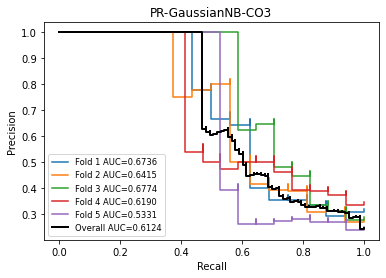

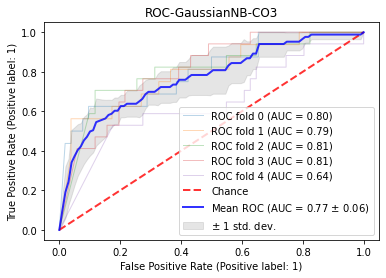

In [15]:
naivebayes_with_cross_validation(co3['X'],co3['Y'],1,'CO3',best_co3)

{'priors': None, 'var_smoothing': 1}
MCC Score- Mean: 0.368 SD: (0.192)
['fit_time', 'score_time', 'test_mccScorer', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_ruc_auc']
Means [0.4033555  0.02986131 0.3683551  0.81764706 0.41221994 0.54909091
 0.46878675 0.70697135]
SD [0.00294079 0.0005156  0.1918793  0.05060191 0.13341348 0.20494708
 0.16001083 0.11047468]


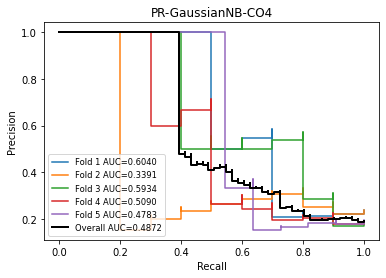

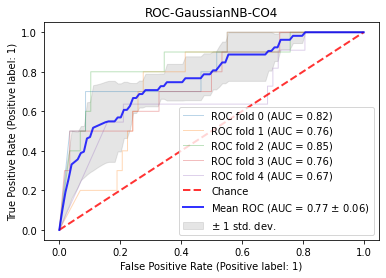

In [17]:
naivebayes_with_cross_validation(co4['X'],co4['Y'],1,'CO4',best_co4)

{'priors': None, 'var_smoothing': 1}
MCC Score- Mean: 0.806 SD: (0.044)
['fit_time', 'score_time', 'test_mccScorer', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_ruc_auc']
Means [0.22457027 0.0202085  0.80572854 0.90294118 0.86015518 0.92436782
 0.89089484 0.90557122]
SD [0.00157563 0.00044171 0.04396474 0.02200975 0.03001905 0.02617461
 0.02508454 0.02172893]


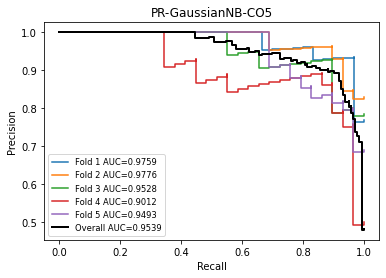

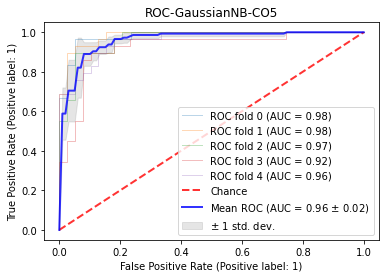

In [18]:
naivebayes_with_cross_validation(co5['X'],co5['Y'],1,'CO5',best_co5)

{'priors': None, 'var_smoothing': 1}
MCC Score- Mean: 0.275 SD: (0.073)
['fit_time', 'score_time', 'test_mccScorer', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_ruc_auc']
Means [0.25940013 0.02359757 0.27535806 0.65294118 0.68845174 0.75
 0.71597877 0.63214286]
SD [0.00398212 0.00089752 0.07326471 0.03789441 0.02593441 0.07905694
 0.04144349 0.0343489 ]


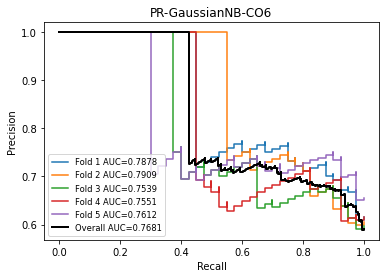

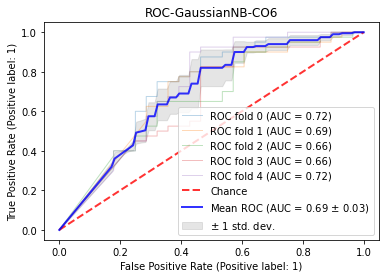

In [19]:
naivebayes_with_cross_validation(co6['X'],co6['Y'],1,'CO6',best_co6)